NOTICE!
This notebook relies on rotation matrices computed via blender using the following code (which also requires manual annotation of the anatomical plane and an aligned image registered to either landmarks OR through 3D printing ground-truth angle and distance)

Here is the code producing the matrices when everything is aligned



In [ ]:
# Here's the function, don't run it here
# import bpy, os, math, mathutils, json
#
# # ======================================================================
# # Blender Script v14: Anatomy-Based Correction + Debug & Data Export
# #  - Computes tilt + roll (with hemisphere guard) and exports two JSONs per eye:
# #      1) rot_matrix_v12.json: transforms image-plane → anatomical frame
# #      2) data_matrix_v12.json: to apply on gaze-direction vectors downstream
# #  - Prints detailed debug info for normals, projection dots, raw vs. clamped roll
# # ======================================================================
#
# def align_vectors_at_point(eye_pt, v_from, v_to):
#     v1, v2 = v_from.normalized(), v_to.normalized()
#     dot = max(-1.0, min(1.0, v1.dot(v2)))
#     T1 = mathutils.Matrix.Translation(-eye_pt)
#     T2 = mathutils.Matrix.Translation( eye_pt)
#     if dot > 0.999999:
#         return mathutils.Matrix.Identity(4)
#     if dot < -0.999999:
#         axis = v1.orthogonal().normalized(); angle = math.pi
#     else:
#         axis = v1.cross(v2).normalized(); angle = math.acos(dot)
#     return T2 @ mathutils.Matrix.Rotation(angle,4,axis) @ T1
#
#
# def angle_between_vectors_signed(v1, v2, normal):
#     u1, u2 = v1.normalized(), v2.normalized()
#     dot = max(-1.0, min(1.0, u1.dot(u2)))
#     ang = math.acos(dot)
#     sign = 1.0 if u1.cross(u2).dot(normal) > 0 else -1.0
#     return sign * ang
#
#
# def normalize_deg(a):
#     return (a + 180.0) % 360.0 - 180.0
#
#
# def compute_eye_alignment_v14(side, export_normals=False):
#     # fetch objects
#     objs = bpy.data.objects
#     eye_ctr = objs[f"{side}_eye_center"].location
#     img_obj = objs[f"{side}_image"]
#     ear     = objs[f"{side}_ear"].location
#     nost    = objs[f"{side}_nostril"].location
#     mark    = objs[f"{side}_marker_3d1"].location
#
#     # anatomical normal (nostril-ear x marker-nostril)
#     A = nost - ear; B = mark - nost
#     n_ref = A.cross(B)
#     if n_ref.length < 1e-6:
#         raise ValueError(f"{side}: anatomical normal zero length")
#     n_ref.normalize()
#     # ensure outward in -Y
#     if n_ref.y > 0:
#         n_ref.negate()
#     print(f"[{side}] n_ref (anatomical) = {tuple(n_ref)}")
#
#     # image-plane normal (+Z local)
#     m_img = img_obj.matrix_world.to_3x3()
#     n_img = (m_img @ mathutils.Vector((0,0,1))).normalized()
#     print(f"[{side}] n_img (image)      = {tuple(n_img)}")
#
#     # tilt to align normals
#     R_norm4 = align_vectors_at_point(eye_ctr, n_img, n_ref)
#
#     # roll to align image X to anatomical X
#     cur_x   = (m_img @ mathutils.Vector((1,0,0))).normalized()
#     cur_x_t = (R_norm4.to_3x3() @ cur_x).normalized()
#     # project anatomical axis A into the plane
#     proj = (A.normalized() - A.normalized().dot(n_ref)*n_ref)
#     proj.normalize()
#     dot_proj = proj.dot(cur_x_t)
#     print(f"[{side}] projection dot (anat→plane) = {dot_proj:.4f}")
#     if dot_proj < 0:
#         proj.negate()
#         print(f"[{side}] flipped anat_x_p to hemisphere of cur_x_t")
#     anat_x_p = proj
#
#     raw_roll_rad = angle_between_vectors_signed(cur_x_t, anat_x_p, n_ref)
#     raw_roll_deg = math.degrees(raw_roll_rad)
#     # clamp into -180..180 for display only
#     disp_roll = normalize_deg(raw_roll_deg)
#     print(f"[{side}] raw roll = {disp_roll:.2f}°")
#     # use raw_roll_rad directly (no extra clamp)
#     roll_rad = raw_roll_rad
#     roll_deg = normalize_deg(math.degrees(roll_rad))
#     print(f"[{side}] applied roll = {roll_deg:.2f}°")
#
#     # build roll+tilt
#     R_roll4 = (
#         mathutils.Matrix.Translation( eye_ctr ) @
#         mathutils.Matrix.Rotation( roll_rad, 4, n_ref ) @
#         mathutils.Matrix.Translation(-eye_ctr )
#     )
#     R_full3 = (R_roll4 @ R_norm4).to_3x3()
#
#     # export JSONs
#     proj_dir = os.path.dirname(bpy.data.filepath)
#     rot_path = os.path.join(proj_dir, f"{side}_rot_matrix_v14.json")
#     data_path= os.path.join(proj_dir, f"{side}_data_matrix_v14.json")
#
#     # 1) export the Blender->anatomical rotation
#     with open(rot_path, 'w') as f:
#         json.dump([[R_full3[i][j] for j in range(3)] for i in range(3)], f, indent=2)
#     print(f"[{side}] exported rot_matrix_v14 to {rot_path}")
#
#     # 2) export the matrix to apply to gaze vectors: use its inverse
#     R_data = R_full3.inverted()
#     with open(data_path, 'w') as f:
#         json.dump([[R_data[i][j] for j in range(3)] for i in range(3)], f, indent=2)
#     print(f"[{side}] exported data_matrix_v14 to {data_path}")
#
#     if export_normals:
#         norm_path = os.path.join(proj_dir, f"{side}_normals_v14.json")
#         with open(norm_path, 'w') as f:
#             json.dump({'n_ref':list(n_ref), 'n_img':list(n_img)}, f, indent=2)
#         print(f"[{side}] exported normals_v14 to {norm_path}")
#
#     return R_full3, R_data, n_ref, n_img
#
#
# if __name__=='__main__':
#     for s in ('l','r'):
#         compute_eye_alignment_v14(s, export_normals=True)
#     print("[v14] Done.")


In [ ]:
# # and here's a verification function
# import bpy, os, json, mathutils
#
# # ======================================================================
# # Blender Verification v3: Compatible with v11 JSON format
# #   - Reads *_rot_matrix_v11.json and *_normals_v11.json (n_ref & n_img only)
# #   - Ignores 'cam_forward' key if absent
# #   - Duplicates image-plane, applies rotation, and
# #     draws reference plane using n_ref.
# # ======================================================================
#
# def load_rotation(path):
#     """Load 3×3 rotation JSON into a 4×4 Matrix."""
#     raw = json.load(open(path, 'r'))
#     M3  = mathutils.Matrix([[raw[i][j] for j in range(3)] for i in range(3)])
#     return M3.to_4x4()
#
#
# def load_normals(path):
#     """Load normals JSON with keys 'n_ref' and optionally 'n_img'."""
#     data = json.load(open(path, 'r'))
#     n_ref = mathutils.Vector(data['n_ref']).normalized()
#     # n_img may be present or omitted
#     n_img = mathutils.Vector(data.get('n_img', [0,0,1])).normalized()
#     return n_ref, n_img
#
#
# def visualize_alignment(side: str):
#     """
#     Duplicate the <side>_image plane, apply the rotation matrix,
#     and place an anatomical reference plane at the eye center using n_ref.
#     """
#     blend_fp = bpy.data.filepath
#     proj_dir = os.path.dirname(blend_fp)
#     rot_fp   = os.path.join(proj_dir, f"{side}_rot_matrix_v14.json")
#     norm_fp  = os.path.join(proj_dir, f"{side}_normals_v14.json")
#
#     try:
#         R4      = load_rotation(rot_fp)
#         n_ref, n_img = load_normals(norm_fp)
#     except Exception as e:
#         print(f"Error loading JSON for {side}: {e}")
#         return
#
#     # Fetch objects
#     img_obj = bpy.data.objects.get(f"{side}_image")
#     eye_ctr = bpy.data.objects.get(f"{side}_eye_center").location.copy()
#
#     # Duplicate & rotate image plane
#     dup = img_obj.copy()
#     dup.data = img_obj.data.copy()
#     dup.name = f"{side}_image_rotated"
#     bpy.context.collection.objects.link(dup)
#     T1 = mathutils.Matrix.Translation(-eye_ctr)
#     T2 = mathutils.Matrix.Translation( eye_ctr)
#     print(T1,T2)
#     dup.matrix_world = T2 @ R4 @ T1 @ img_obj.matrix_world
#
#     # Create anatomical reference plane at eye center
#     bpy.ops.mesh.primitive_plane_add(size=0.5, location=eye_ctr)
#     ref = bpy.context.active_object
#     ref.name = f"{side}_anatom_ref_plane"
#     ref.rotation_mode = 'QUATERNION'
#     # Orient local +Z to n_ref
#     ref.rotation_quaternion = n_ref.to_track_quat('Z', 'Y')
#
#     # Apply semi-transparent red material
#     mat = bpy.data.materials.new(name=f"{side}_ref_mat")
#     mat.diffuse_color = (1.0, 0.0, 0.0, 0.3)
#     mat.blend_method  = 'BLEND'
#     if ref.data.materials:
#         ref.data.materials[0] = mat
#     else:
#         ref.data.materials.append(mat)
#
#
# def main():
#     print("[v3] Starting verification with v11 JSON format...")
#     for side in ('l', 'r'):
#         visualize_alignment(side)
#     print("[v3] Verification complete.")
#
# main()


In [17]:
import json
import datetime
import numpy as np
import cv2
from itertools import cycle
import pickle
import pathlib
import math
import tqdm
import scipy.io
from matplotlib import pyplot as plt
import scipy.io
import h5py
import re
from lxml import etree as ET
import scipy.signal as sig
import pandas as pd
from scipy.stats import kde
from BlockSync_current import BlockSync
import UtilityFunctions_newOE as uf
from scipy import signal
import bokeh
import seaborn as sns
from matplotlib import rcParams

rcParams['pdf.fonttype'] = 42  # Ensure fonts are embedded and editable
rcParams['ps.fonttype'] = 42  # Ensure compatibility with vector outputs
%matplotlib inline

def angles_to_vecs(phi_deg, theta_deg):
    """
    phi = azimuth, theta = elevation, both in degrees.
    Returns array shape (N,3) of unit vectors.
    """
    phi = np.deg2rad(phi_deg)
    theta = np.deg2rad(theta_deg)
    x = np.cos(theta) * np.cos(phi)
    y = np.cos(theta) * np.sin(phi)
    z = np.sin(theta)
    return np.stack([x, y, z], axis=1)

def vecs_to_angles(v):
    """
    v: array (N,3) of vectors.
    Returns (phi_deg, theta_deg).
    """
    x, y, z = v[:,0], v[:,1], v[:,2]
    phi = np.rad2deg(np.arctan2(y, x))
    theta = np.rad2deg(np.arctan2(z, np.sqrt(x**2 + y**2)))
    return phi, theta


def bokeh_plotter(data_list, x_axis_list=None, label_list=None,
                  plot_name='default',
                  x_axis_label='X', y_axis_label='Y',
                  peaks=None, peaks_list=False, export_path=False):
    """Generates an interactive Bokeh plot for the given data vector.
    Args:
        data_list (list or array): The data to be plotted.
        label_list (list of str): The labels of the data vectors
        plot_name (str, optional): The title of the plot. Defaults to 'default'.
        x_axis (str, optional): The label for the x-axis. Defaults to 'X'.
        y_axis (str, optional): The label for the y-axis. Defaults to 'Y'.
        peaks (list or array, optional): Indices of peaks to highlight on the plot. Defaults to None.
        export_path (False or str): when set to str, will output the resulting html fig
    """
    color_cycle = cycle(bokeh.palettes.Category10_10)
    fig = bokeh.plotting.figure(title=f'bokeh explorer: {plot_name}',
                                x_axis_label=x_axis_label,
                                y_axis_label=y_axis_label,
                                plot_width=1500,
                                plot_height=700)

    for i, data_vector in enumerate(data_list):

        color = next(color_cycle)

        if x_axis_list is None:
            x_axis = range(len(data_vector))
        elif len(x_axis_list) == len(data_list):
            print('x_axis manually set')
            x_axis = x_axis_list[i]
        else:
            raise Exception(
                'problem with x_axis_list input - should be either None, or a list with the same length as data_list')
        if label_list is None:
            fig.line(x_axis, data_vector, line_color=color, legend_label=f"Line {i + 1}")
        elif len(label_list) == len(data_list):
            fig.line(range(len(data_vector)), data_vector, line_color=color, legend_label=f"{label_list[i]}")
        if peaks is not None and peaks_list is True:
            fig.circle(peaks[i], data_vector[peaks[i]], size=10, color=color)

    if peaks is not None and peaks_list is False:
        fig.circle(peaks, data_vector[peaks], size=10, color='red')

    if export_path is not False:
        print(f'exporting to {export_path}')
        bokeh.io.output.output_file(filename=str(export_path / f'{plot_name}.html'), title=f'{plot_name}')
    bokeh.plotting.show(fig)


def load_eye_data_2d_w_rotation_matrix(block):
    """
    This function checks if the eye dataframes and rotation dict object exist, then imports them
    :param block: The current blocksync class with verifiec re/le dfs
    :return: None
    """
    try:
        block.left_eye_data = pd.read_csv(block.analysis_path / 'left_eye_data.csv', index_col=0, engine='python')
        block.right_eye_data = pd.read_csv(block.analysis_path / 'right_eye_data.csv', index_col=0, engine='python')
    except FileNotFoundError:
        print('eye_data files not found, run the pipeline!')
        return

    try:
        with open(block.analysis_path / 'rotate_eye_data_params.pkl', 'rb') as file:
            rotation_dict = pickle.load(file)
            block.left_rotation_matrix = rotation_dict['left_rotation_matrix']
            block.right_rotation_matrix = rotation_dict['right_rotation_matrix']
            block.left_rotation_angle = rotation_dict['left_rotation_angle']
            block.right_rotation_angle = rotation_dict['right_rotation_angle']
    except FileNotFoundError:
        print('No rotation matrix file, create it')


def create_saccade_events_df(eye_data_df, speed_threshold, bokeh_verify_threshold=False, magnitude_calib=1,
                             speed_profile=True):
    """
    Detects saccade events in eye tracking data and computes relevant metrics.

    Parameters:
    - eye_data_df (pd.DataFrame): Input DataFrame containing eye tracking data.
    - speed_threshold (float): Threshold for saccade detection based on speed.

    Returns:
    - df (pd.DataFrame): Modified input DataFrame with added columns for speed and saccade detection.
    - saccade_events_df (pd.DataFrame): DataFrame containing information about detected saccade events.

    Steps:
    1. Calculate speed components ('speed_x', 'speed_y') based on differences in 'center_x' and 'center_y'.
    2. Compute the magnitude of the velocity vector ('speed_r').
    3. Create a binary column ('is_saccade') indicating saccade events based on the speed threshold.
    4. Determine saccade onset and offset indices and timestamps.
    5. Create a DataFrame ('saccade_events_df') with columns:
        - 'saccade_start_ind': Indices of saccade onset.
        - 'saccade_start_timestamp': Timestamps corresponding to saccade onset.
        - 'saccade_end_ind': Indices of saccade offset.
        - 'saccade_end_timestamp': Timestamps corresponding to saccade offset.
        - 'length': Duration of each saccade event.
    6. Calculate distance traveled and angles for each saccade event.
    7. Append additional columns to 'saccade_events_df':
        - 'magnitude': Magnitude of the distance traveled during each saccade.
        - 'angle': Angle of the saccade vector in degrees.
        - 'initial_x', 'initial_y': Initial coordinates of the saccade.
        - 'end_x', 'end_y': End coordinates of the saccade.

    Note: The original 'eye_data_df' is not modified; modified data is returned as 'df'.
    """
    df = eye_data_df
    df['speed_x'] = df['center_x'].diff()  # Difference between consecutive 'center_x' values
    df['speed_y'] = df['center_y'].diff()  # Difference between consecutive 'center_y' values

    # Step 2: Calculate magnitude of the velocity vector (R vector speed)
    df['speed_r'] = (df['speed_x'] ** 2 + df['speed_y'] ** 2) ** 0.5

    # Create a column for saccade detection
    df['is_saccade'] = df['speed_r'] > speed_threshold

    # create a saccade_on_off indicator where 1 is rising edge and -1 is falling edge by subtracting a shifted binary mask
    saccade_on_off = df.is_saccade.astype(int) - df.is_saccade.shift(periods=1, fill_value=False).astype(int)
    saccade_on_inds = np.where(saccade_on_off == 1)[
                          0] - 1  # notice the manual shift here, chosen to include the first (sometimes slower) eye frame, just before saccade threshold crossing
    saccade_on_ms = df['ms_axis'].iloc[saccade_on_inds]
    saccade_on_timestamps = df['OE_timestamp'].iloc[saccade_on_inds]
    saccade_off_inds = np.where(saccade_on_off == -1)[0]
    saccade_off_timestamps = df['OE_timestamp'].iloc[saccade_off_inds]
    saccade_off_ms = df['ms_axis'].iloc[saccade_off_inds]

    saccade_dict = {'saccade_start_ind': saccade_on_inds,
                    'saccade_start_timestamp': saccade_on_timestamps.values,
                    'saccade_end_ind': saccade_off_inds,
                    'saccade_end_timestamp': saccade_off_timestamps.values,
                    'saccade_on_ms': saccade_on_ms.values,
                    'saccade_off_ms': saccade_off_ms.values}

    saccade_events_df = pd.DataFrame.from_dict(saccade_dict)
    saccade_events_df['length'] = saccade_events_df['saccade_end_ind'] - saccade_events_df['saccade_start_ind']
    # Drop columns used for intermediate steps
    df = df.drop(['is_saccade'], axis=1)

    distances = []
    angles = []
    speed_list = []
    diameter_list = []
    for index, row in tqdm.tqdm(saccade_events_df.iterrows()):
        saccade_samples = df.loc[(df['OE_timestamp'] >= row['saccade_start_timestamp']) &
                                 (df['OE_timestamp'] <= row['saccade_end_timestamp'])]
        distance_traveled = saccade_samples['speed_r'].sum()
        if speed_profile:
            saccade_speed_profile = saccade_samples['speed_r'].values
            speed_list.append(saccade_speed_profile)
        saccade_diameter_profile = saccade_samples['pupil_diameter'].values
        diameter_list.append(saccade_diameter_profile)
        # Calculate angle from initial position to endpoint
        initial_position = saccade_samples.iloc[0][['center_x', 'center_y']]
        endpoint = saccade_samples.iloc[-1][['center_x', 'center_y']]
        overall_angle = np.arctan2(endpoint['center_y'] - initial_position['center_y'],
                                   endpoint['center_x'] - initial_position['center_x'])

        angles.append(overall_angle)
        distances.append(distance_traveled)

    saccade_events_df['magnitude_raw'] = np.array(distances)
    saccade_events_df['magnitude'] = np.array(distances) * magnitude_calib
    saccade_events_df['angle'] = np.where(np.isnan(angles), angles, np.rad2deg(
        angles) % 360)  # Convert radians to degrees and ensure result is in [0, 360)
    start_ts = saccade_events_df['saccade_start_timestamp'].values
    end_ts = saccade_events_df['saccade_end_timestamp'].values
    saccade_start_df = df[df['OE_timestamp'].isin(start_ts)]
    saccade_end_df = df[df['OE_timestamp'].isin(end_ts)]
    start_x_coord = saccade_start_df['center_x']
    start_y_coord = saccade_start_df['center_y']
    end_x_coord = saccade_end_df['center_x']
    end_y_coord = saccade_end_df['center_y']
    saccade_events_df['initial_x'] = start_x_coord.values
    saccade_events_df['initial_y'] = start_y_coord.values
    saccade_events_df['end_x'] = end_x_coord.values
    saccade_events_df['end_y'] = end_y_coord.values
    saccade_events_df['calib_dx'] = (saccade_events_df['end_x'].values - saccade_events_df[
        'initial_x'].values) * magnitude_calib
    saccade_events_df['calib_dy'] = (saccade_events_df['end_y'].values - saccade_events_df[
        'initial_y'].values) * magnitude_calib
    if speed_profile:
        saccade_events_df['speed_profile'] = speed_list
    saccade_events_df['diameter_profile'] = diameter_list
    if bokeh_verify_threshold:
        bokeh_plotter(data_list=[df.speed_r], label_list=['Pupil Velocity'], peaks=saccade_on_inds)

    return df, saccade_events_df


# create a multi-animal block_collection:

def create_block_collections(animals, block_lists, experiment_path, bad_blocks=None):
    """
    Create block collections and a block dictionary from multiple animals and their respective block lists.

    Parameters:
    - animals: list of str, names of the animals.
    - block_lists: list of lists of int, block numbers corresponding to each animal.
    - experiment_path: pathlib.Path, path to the experiment directory.
    - bad_blocks: list of int, blocks to exclude. Default is an empty list.

    Returns:
    - block_collection: list of BlockSync objects for all specified blocks.
    - block_dict: dictionary where keys are block numbers as strings and values are BlockSync objects.
    """
    import UtilityFunctions_newOE as uf

    if bad_blocks is None:
        bad_blocks = []

    block_collection = []
    block_dict = {}

    for animal, blocks in zip(animals, block_lists):
        # Generate blocks for the current animal
        current_blocks = uf.block_generator(
            block_numbers=blocks,
            experiment_path=experiment_path,
            animal=animal,
            bad_blocks=bad_blocks
        )
        # Add to collection and dictionary
        block_collection.extend(current_blocks)
        for b in current_blocks:
            block_dict[f"{animal}_block_{b.block_num}"] = b

    return block_collection, block_dict


animals = ['PV_62']
block_lists = [[24, 26, 38]]
experiment_path = pathlib.Path(r"Z:\Nimrod\experiments")
bad_blocks = [0]  # Example of bad blocks

block_collection, block_dict = create_block_collections(
    animals=animals,
    block_lists=block_lists,
    experiment_path=experiment_path,
    bad_blocks=bad_blocks
)

instantiated block number 024 at Path: Z:\Nimrod\experiments\PV_62\2023_04_27\block_024, new OE version
Found the sample rate for block 024 in the xml file, it is 20000 Hz
created the .oe_rec attribute as an open ephys recording obj with get_data functionality
retrieving zertoh sample number for block 024
got it!
instantiated block number 026 at Path: Z:\Nimrod\experiments\PV_62\2023_04_27\block_026, new OE version
Found the sample rate for block 026 in the xml file, it is 20000 Hz
created the .oe_rec attribute as an open ephys recording obj with get_data functionality
retrieving zertoh sample number for block 026
got it!
instantiated block number 038 at Path: Z:\Nimrod\experiments\PV_62\2023_05_01\block_038, new OE version
Found the sample rate for block 038 in the xml file, it is 20000 Hz
created the .oe_rec attribute as an open ephys recording obj with get_data functionality
retrieving zertoh sample number for block 038
got it!


In [18]:
for block in block_collection:
    block.left_eye_data = pd.read_csv(block.analysis_path / 'left_eye_data_degrees_raw_verified.csv')
    block.right_eye_data = pd.read_csv(block.analysis_path / 'right_eye_data_degrees_raw_verified.csv')

In [19]:
for block in block_collection:
    block.parse_open_ephys_events()
    block.get_eye_brightness_vectors()
    block.synchronize_block()
    block.create_eye_brightness_df(threshold_value=20)

    # if the code fails here, go to manual synchronization
    #block.import_manual_sync_df()
    #block.read_dlc_data()
    #block.calibrate_pixel_size(10)
    #load_eye_data_2d_w_rotation_matrix(block) #should be integrated again... later

    # calibrate pupil diameter:
    if 'pupil_diameter' not in block.left_eye_data.columns:
        block.left_eye_data['pupil_diameter_pixels'] = block.left_eye_data.major_ax
        block.right_eye_data['pupil_diameter_pixels'] = block.right_eye_data.major_ax
        block.left_eye_data['pupil_diameter'] = block.left_eye_data['pupil_diameter_pixels'] * block.L_pix_size
        block.right_eye_data['pupil_diameter'] = block.right_eye_data['pupil_diameter_pixels'] * block.R_pix_size

running parse_open_ephys_events...
block 024 has a parsed events file, reading...
Getting eye brightness values for block 024...
Found an existing file!
Eye brightness vectors generation complete.
blocksync_df loaded from analysis folder
eye_brightness_df loaded from analysis folder
running parse_open_ephys_events...
block 026 has a parsed events file, reading...
Getting eye brightness values for block 026...
Found an existing file!
Eye brightness vectors generation complete.
blocksync_df loaded from analysis folder
eye_brightness_df loaded from analysis folder
running parse_open_ephys_events...
block 038 has a parsed events file, reading...
Getting eye brightness values for block 038...
Found an existing file!
Eye brightness vectors generation complete.
blocksync_df loaded from analysis folder
eye_brightness_df loaded from analysis folder


In [20]:
# assuming `block` already has left_eye_data / right_eye_data loaded
# This is for pv_57:
# blender_project_path = pathlib.Path(
#    r"D:\MarkS3\Documents\BlenderFiles\Camera_angle_registration\PV_57_textured-20250325T102628Z-001")
#This is for pv 62
blender_project_path = pathlib.Path(
    r'D:\MarkS3\Documents\BlenderFiles\Camera_angle_registration\PV_62_textured-20250325T102627Z-001'
)
# This is for pv_126:
# blender_project_path = pathlib.Path(
#     r'D:\MarkS3\Documents\BlenderFiles\Camera_angle_registration\PV_126_textured-20250325T102624Z-001'
# )
# left_json_path = blender_project_path / "l_rot_matrix_v11.json"
# right_json_path = blender_project_path / "r_rot_matrix_v11.json"
# right_n_json_path = blender_project_path / "r_normals_v11.json"
# left_n_json_path = blender_project_path / "l_normals_v11.json"
left_data_json_path = blender_project_path / 'l_data_matrix_v14.json'
right_data_json_path = blender_project_path / 'r_data_matrix_v14.json'
right_rot_json_path = blender_project_path / 'r_rot_matrix_v14.json'
left_rot_json_path = blender_project_path / 'l_rot_matrix_v14.json'
left_n_json_path = blender_project_path / 'l_normals_v14.json'
right_n_json_path = blender_project_path / 'r_normals_v14.json'

In [21]:
# Cell 4: load rotation matrices
with open(left_rot_json_path, 'r') as f:
    R_l = np.array(json.load(f))  # shape (3,3)
with open(right_rot_json_path, 'r') as f:
    R_r = np.array(json.load(f))  # shape (3,3)

In [22]:
# This is the angle correction portion of the code, dealing with real data according to the rotation matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

# — conversion between (φ,θ) and unit‐vectors in your [forward, right, up] basis —
def angles_to_vecs(phi_deg, theta_deg):
    phi   = np.deg2rad(phi_deg)
    theta = np.deg2rad(theta_deg)
    x = np.cos(theta) * np.cos(phi)   # forward
    y = np.cos(theta) * np.sin(phi)   # right
    z = np.sin(theta)                 # up
    return np.stack([x, y, z], axis=1)

def vecs_to_angles(v):
    x, y, z = v[:,0], v[:,1], v[:,2]
    phi   = np.rad2deg(np.arctan2(y, x))
    theta = np.rad2deg(np.arctan2(z, np.sqrt(x**2 + y**2)))
    return phi, theta

block = block_collection[0]

df_l = block.left_eye_data
df_r = block.right_eye_data


# 1) to vectors in your [fwd,right,up] basis
cam_vecs_l = angles_to_vecs(df_l['k_phi'], df_l['k_theta'])   # shape (N,3)
cam_vecs_r = angles_to_vecs(df_r['k_phi'], df_r['k_theta'])   # shape (N,3)

# 2) permute into Blender basis [X=right,Y=forward,Z=up]
bl_vecs_l = cam_vecs_l[:, [1, 0, 2]]
bl_vecs_r = cam_vecs_r[:, [1, 0, 2]]

# 3) apply inverse rotation R^{-1} = R^T
bl_corr_l = bl_vecs_l.dot(R_l.T)
bl_corr_r = bl_vecs_r.dot(R_r.T)

# 4) permute *back* into your [forward, right, up] basis
corr_l = bl_corr_l[:, [1, 0, 2]]
corr_r = bl_corr_r[:, [1, 0, 2]]

# 5) convert back to (φ,θ)
df_l['corr_phi'], df_l['corr_theta'] = vecs_to_angles(corr_l)
df_r['corr_phi'], df_r['corr_theta'] = vecs_to_angles(corr_r)

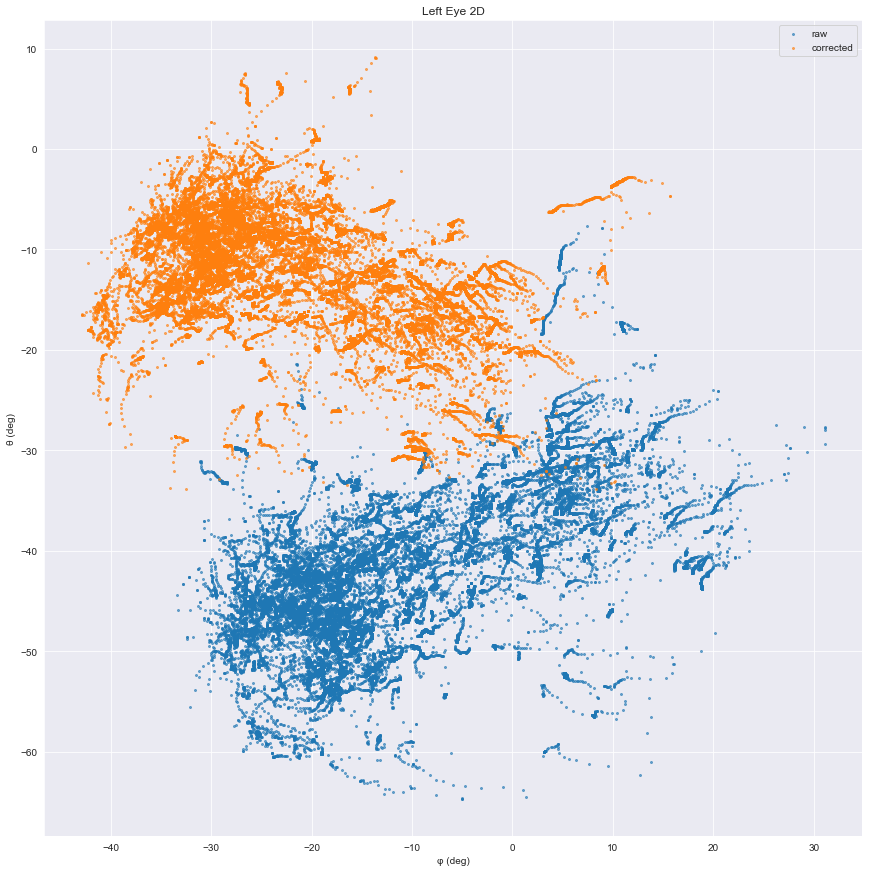

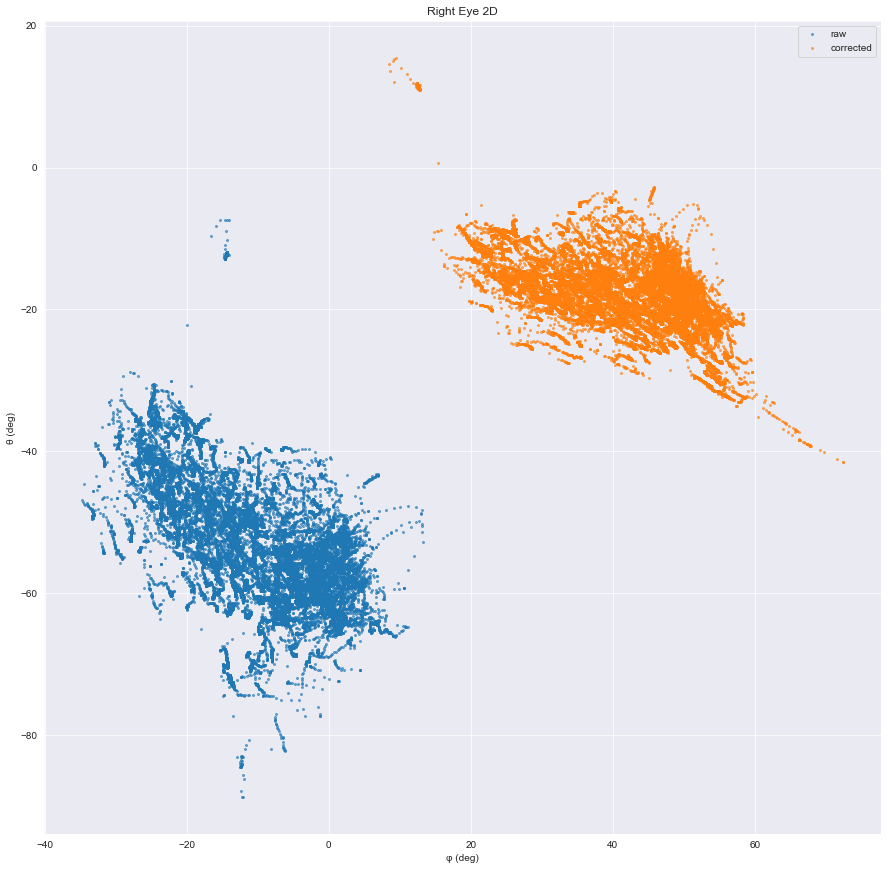

In [23]:
# basic verification plot
for eye, df in [('Left', df_l), ('Right', df_r)]:
    # 2D φ–θ comparison
    plt.figure(figsize=(15,15))
    plt.scatter(df['k_phi'],      df['k_theta'],      s=4, alpha=0.6, label='raw')
    plt.scatter(df['corr_phi'], df['corr_theta'], s=4, alpha=0.6, label='corrected')
    plt.title(f'{eye} Eye 2D')
    plt.xlabel('φ (deg)'); plt.ylabel('θ (deg)')
    plt.gca().set_aspect('equal', 'box')
    plt.legend()
    plt.show()

In [2]:
0# basic verification plot (prev_version)
for eye, df in [('Left', df_l), ('Right', df_r)]:
    # 2D φ–θ comparison
    plt.figure(figsize=(15,15))
    plt.scatter(df['k_phi'],      df['k_theta'],      s=4, alpha=0.6, label='raw')
    plt.scatter(df['corr_phi'], df['corr_theta'], s=4, alpha=0.6, label='corrected')
    plt.title(f'{eye} Eye 2D')
    plt.xlabel('φ (deg)'); plt.ylabel('θ (deg)')
    plt.gca().set_aspect('equal', 'box')
    plt.legend()
    plt.show()

NameError: name 'df_l' is not defined

In [24]:
# Only run this when ready for export - check on a single block beforehand
def export_eye_data_w_angles(block, name_tag='0'):
    block.right_eye_data.to_csv(block.analysis_path / f'right_eye_data_{name_tag}.csv')
    block.left_eye_data.to_csv(block.analysis_path / f'left_eye_data_{name_tag}.csv')

# main loop for correcting all angles for a single animal:
print(f'working on animal {block.animal_call}')
for block in block_collection:
    print(f'correcting block {block.block_num}')
    df_l = block.left_eye_data
    df_r = block.right_eye_data


    # 1) to vectors in your [fwd,right,up] basis
    cam_vecs_l = angles_to_vecs(df_l['k_phi'], df_l['k_theta'])   # shape (N,3)
    cam_vecs_r = angles_to_vecs(df_r['k_phi'], df_r['k_theta'])   # shape (N,3)

    # 2) permute into Blender basis [X=right,Y=forward,Z=up]
    bl_vecs_l = cam_vecs_l[:, [1, 0, 2]]
    bl_vecs_r = cam_vecs_r[:, [1, 0, 2]]

    # 3) apply inverse rotation R^{-1} = R^T
    bl_corr_l = bl_vecs_l.dot(R_l.T)
    bl_corr_r = bl_vecs_r.dot(R_r.T)

    # 4) permute *back* into your [forward, right, up] basis
    corr_l = bl_corr_l[:, [1, 0, 2]]
    corr_r = bl_corr_r[:, [1, 0, 2]]

    # 5) convert back to (φ,θ)
    df_l['corr_phi'], df_l['corr_theta'] = vecs_to_angles(corr_l)
    df_r['corr_phi'], df_r['corr_theta'] = vecs_to_angles(corr_r)

    block.left_eye_data = df_l.copy()
    block.right_eye_data = df_r.copy()

    export_eye_data_w_angles(block,name_tag='3d_corr_verified')


working on animal PV_62
correcting block 024
correcting block 026
correcting block 038


R_l [[ 0.92378402  0.19364068  0.33034283]
 [-0.08482303  0.94475979 -0.31659764]
 [-0.37340078  0.26444712  0.88917917]]


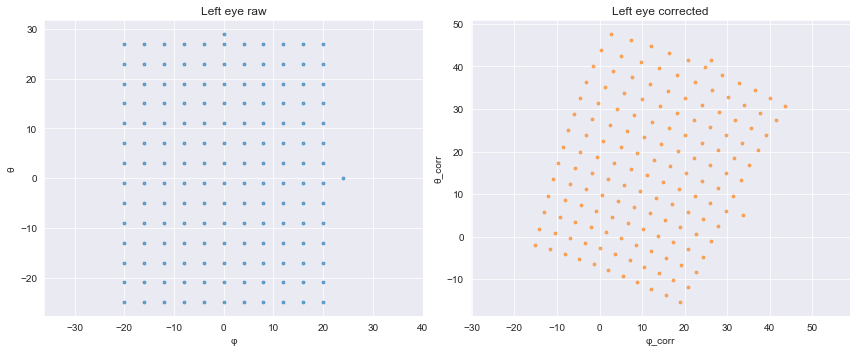

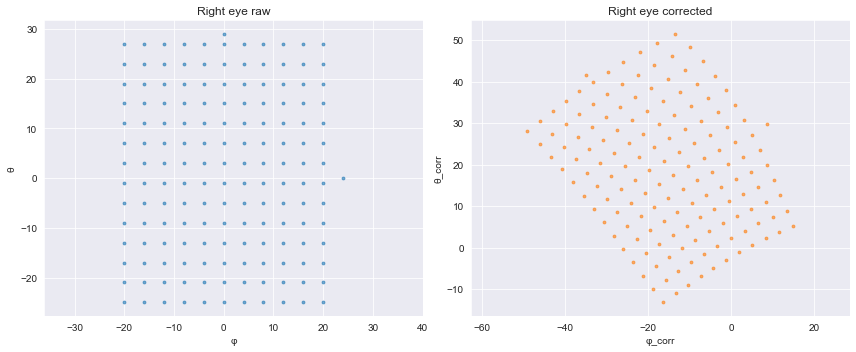

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
BP = pathlib.Path(
    r"D:\MarkS3\Documents\BlenderFiles\Camera_angle_registration\PV_57_textured-20250325T102628Z-001"
)


R_l_path = BP / "l_rot_matrix_v14.json"
R_r_path = BP / "r_rot_matrix_v14.json"


with open(R_l_path,'r') as f:
    R_l = np.array(json.load(f))    # shape (3,3)
with open(R_r_path,'r') as f:
    R_r = np.array(json.load(f))

print('R_l',R_l)
# — conversion between (φ,θ) and unit‐vectors in your [forward, right, up] basis —
def angles_to_vecs(phi_deg, theta_deg):
    phi   = np.deg2rad(phi_deg)
    theta = np.deg2rad(theta_deg)
    x = np.cos(theta) * np.cos(phi)   # forward
    y = np.cos(theta) * np.sin(phi)   # right
    z = np.sin(theta)                 # up
    return np.stack([x, y, z], axis=1)

def vecs_to_angles(v):
    x, y, z = v[:,0], v[:,1], v[:,2]
    phi   = np.rad2deg(np.arctan2(y, x))
    theta = np.rad2deg(np.arctan2(z, np.sqrt(x**2 + y**2)))
    return phi, theta

# — make your test grid of (k_phi, k_theta) pairs —
def create_test_grid(phi_min, phi_max, theta_min, theta_max, phi_step=4, theta_step=4):
    phis   = np.arange(phi_min, phi_max + phi_step, phi_step)
    thetas = np.arange(theta_min, theta_max + theta_step, theta_step)
    phi_g, theta_g = np.meshgrid(phis, thetas, indexing='xy')
    df = pd.DataFrame({
        'k_phi':   phi_g.ravel(),
        'k_theta': theta_g.ravel()
    })
    # extra corner-points if you like
    extra = pd.DataFrame({
      'k_phi':   [phi_max+phi_step, (phi_min+phi_max)/2],
      'k_theta': [(theta_min+theta_max)/2, theta_max+theta_step]
    })
    return pd.concat([df, extra], ignore_index=True)


# — build grid and copies for left/right —
grid    = create_test_grid(-20, 20, -25, 25)
grid_l  = grid.copy()
grid_r  = grid.copy()

# — (A) Apply the inverse rotation with permutation correction —

# 1) to vectors in your [fwd,right,up] basis
cam_vecs = angles_to_vecs(grid['k_phi'], grid['k_theta'])   # shape (N,3)

# 2) permute into Blender basis [X=right,Y=forward,Z=up]
bl_vecs = cam_vecs[:, [1, 0, 2]]

# 3) apply inverse rotation R^{-1} = R^T
bl_corr_l = bl_vecs.dot(R_l.T)
bl_corr_r = bl_vecs.dot(R_r.T)

# 4) permute *back* into your [forward, right, up] basis
corr_l = bl_corr_l[:, [1, 0, 2]]
corr_r = bl_corr_r[:, [1, 0, 2]]

# 5) convert back to (φ,θ)
grid_l['corr_phi'], grid_l['corr_theta'] = vecs_to_angles(corr_l)
grid_r['corr_phi'], grid_r['corr_theta'] = vecs_to_angles(corr_r)

# — visualize before vs. after —
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(grid_l['k_phi'], grid_l['k_theta'], s=8, alpha=0.6)
plt.title("Left eye raw")
plt.xlabel("φ"); plt.ylabel("θ")
plt.axis('equal')

plt.subplot(1,2,2)
plt.scatter(grid_l['corr_phi'], grid_l['corr_theta'], s=8, alpha=0.6, c='C1')
plt.title("Left eye corrected")
plt.xlabel("φ_corr"); plt.ylabel("θ_corr")
plt.axis('equal')

plt.tight_layout()
plt.show()


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(grid_r['k_phi'], grid_r['k_theta'], s=8, alpha=0.6)
plt.title("Right eye raw")
plt.xlabel("φ"); plt.ylabel("θ")
plt.axis('equal')

plt.subplot(1,2,2)
plt.scatter(grid_r['corr_phi'], grid_r['corr_theta'], s=8, alpha=0.6, c='C1')
plt.title("Right eye corrected")
plt.xlabel("φ_corr"); plt.ylabel("θ_corr")
plt.axis('equal')

plt.tight_layout()
plt.show()
